![drawing](http://www.humour-blague.fr/blagues/titanic.jpg)
# Titanic Survival Data Set

# Data Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from difflib import SequenceMatcher
import re

**Task: After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values**

In [2]:
titanic=pd.read_csv('train_titanic.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preparation

## Cleansing Null Values

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.isnull().sum().sum()

866

### Cabin Variable

![drawing](http://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png)

Assuming that passengers without Cabin number are embarked on the deck (First Class / Second Class / Third Class)

In [7]:
titanic["Cabin"].fillna("Deck",inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

### Age Variable

We will try to correct Age data using other sources on the Internet https://www.encyclopedia-titanica.org otherwise we will use mean() function to replace NaN values

In [8]:
dfency = pd.read_html('https://www.encyclopedia-titanica.org/titanic-passenger-list/')
dfage=dfency[0][["Name","Age","Class/Dept"]]
dfage.head(10)

,Name,Age,Class/Dept
0,"ALLEN, Miss Elisabeth Walton",29,1st Class Passenger
1,"ALLISON, Mrs Bess Waldo",25,1st Class Passenger
2,"ALLISON, Master Hudson Trevor",11m,1st Class Passenger
3,"ALLISON, Miss Helen Loraine",2,1st Class Passenger
4,"ALLISON, Mr Hudson Joshua Creighton",30,1st Class Passenger
5,"ANDERSON, Mr Henry",42,1st Class Passenger
6,"ANDREWS, Miss Cornelia Theodosia",62,1st Class Passenger
7,"ANDREWS, Mr Thomas",39,1st Class Passenger H&W Guarantee Group
8,"APPLETON, Mrs Charlotte",53,1st Class Passenger
9,"ARTAGAVEYTIA, Mr Ramon",71,1st Class Passenger


In [9]:
def get_similar(row,lookup,threshold):
    if row.isnull()["Age"]:
        name=row["Name"]
        sim=lookup["Name"].apply(lambda x :SequenceMatcher(None, x, name).ratio())
        if len(sim.index[sim>threshold].tolist())>0 :
            idx=sim.index[sim>threshold].tolist()[0]
            try: 
                val=float(lookup.iloc[idx,1])
                return val
            except:
                return np.nan
        else:
            return np.nan
    else:
        return row["Age"]

In [10]:
titanic["cAge"]=titanic.apply(lambda row: get_similar(row,dfage,0.50), axis=1)


In [11]:
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
cAge            16
dtype: int64

**Fill uncomplete Age with mean value**

In [12]:
titanic["cAge"].fillna(value=titanic["cAge"].mean(),inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
cAge             0
dtype: int64

### Embarked Variable
Fill uncomplete embarked with U (Unknown)

In [13]:
titanic["Embarked"].fillna(value='U',inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
cAge             0
dtype: int64

## Dealing with Categorical Data

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  cAge         891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [15]:
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

In [16]:

sex_dict={"Sex":{'male': 1, 'female': 2}}
embarked_dict={"Embarked":{"U":0,"C":1,"Q":2,"S":3}}

newtitanic=titanic.drop(["Age"],axis=1)
newtitanic=newtitanic.replace(sex_dict,inplace=False)
newtitanic.replace(embarked_dict,inplace=True)
encoder=LabelEncoder()
newtitanic["Cabin"]=encoder.fit_transform(newtitanic["Cabin"])
newtitanic["Ticket"]=encoder.fit_transform(newtitanic["Ticket"])
newtitanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cAge
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,523,7.2500,115,3,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,596,71.2833,81,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",2,0,0,669,7.9250,115,3,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,49,53.1000,55,3,35.0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,472,8.0500,115,3,35.0


In [17]:
newtitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int64  
 10  Embarked     891 non-null    int64  
 11  cAge         891 non-null    float64
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


## Data Standardization

In [18]:
scaler=StandardScaler()
newtitanic["Fare"]=scaler.fit_transform(newtitanic[["Fare"]].values)


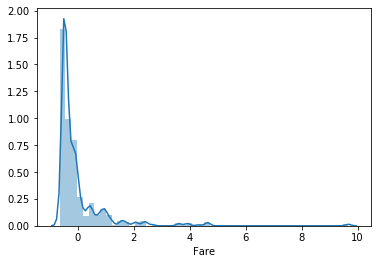

In [19]:
sns.distplot(newtitanic["Fare"])

# Data visualization

## Studying Numerical Variables

### Age Distribution
**Findings**:

- most passengers are aged between 20 years and 40 years
- there are some childs (< 5 years)

- we've got an outliers: for example **Barkworth, Mr. Algernon Henry Wilson**. acording to https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html he was aged 47 years when he boared the Titanic and this seem statistically correct (represented as outlier) 

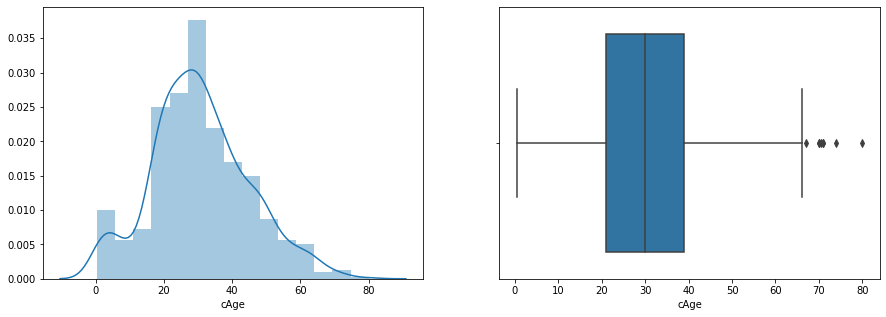

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data=newtitanic["cAge"]
sns.distplot(data,bins=15,hist=True)
plt.subplot(1,2,2)
sns.boxplot(data)

In [21]:
data.describe()

count    891.000000
mean      30.728194
std       14.288099
min        0.420000
25%       21.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: cAge, dtype: float64

**Outliers**

In [22]:
newtitanic[newtitanic["cAge"]>70]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cAge
96,97,0,1,"Goldschmidt, Mr. George B",1,0,0,607,0.049330,12,1,71.0
116,117,0,3,"Connors, Mr. Patrick",1,0,0,460,-0.492378,115,2,70.5
493,494,0,1,"Artagaveytia, Mr. Ramon",1,0,0,603,0.348330,115,1,71.0
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,0,0,218,-0.044381,5,3,80.0
851,852,0,3,"Svensson, Mr. Johan",1,0,0,317,-0.491874,115,3,74.0


### SibSp (sibling number) Distribution
**Findings**:
- most passengers are alone (without siblings)
- The Sage and Goodwin Familly Tragedy

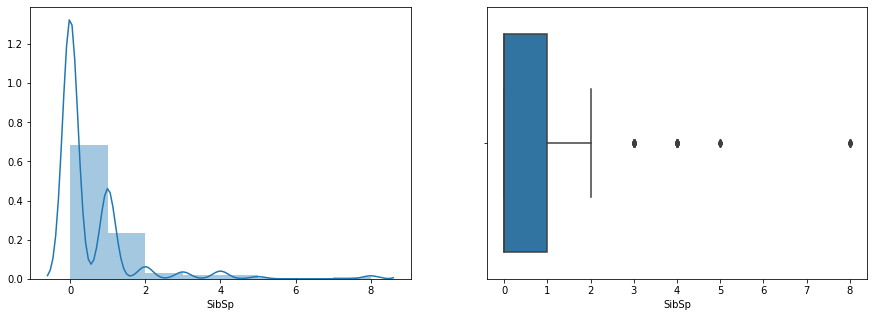

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(newtitanic["SibSp"],bins=8,hist=True)
plt.subplot(1,2,2)
sns.boxplot(newtitanic["SibSp"])

In [24]:

data=newtitanic[["PassengerId","SibSp"]].groupby(["SibSp"]).count().reset_index()
data.columns=["Nb Siblings","Nb.Passengers"]
data.set_index("Nb Siblings")

,Nb.Passengers
Nb Siblings,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


**The Sage and Goodwin Familly Tragedy**

In [25]:
newtitanic[titanic["SibSp"]==8]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cAge
159,160,0,3,"Sage, Master. Thomas Henry",1,8,2,568,0.751946,115,3,39.0
180,181,0,3,"Sage, Miss. Constance Gladys",2,8,2,568,0.751946,115,3,62.0
201,202,0,3,"Sage, Mr. Frederick",1,8,2,568,0.751946,115,3,43.0
324,325,0,3,"Sage, Mr. George John Jr",1,8,2,568,0.751946,115,3,37.0
792,793,0,3,"Sage, Miss. Stella Anna",2,8,2,568,0.751946,115,3,39.0
846,847,0,3,"Sage, Mr. Douglas Bullen",1,8,2,568,0.751946,115,3,49.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",2,8,2,568,0.751946,115,3,36.0


In [26]:
newtitanic[titanic["SibSp"]==5]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cAge
59,60,0,3,"Goodwin, Master. William Frederick",1,5,2,566,0.295895,115,3,11.0
71,72,0,3,"Goodwin, Miss. Lillian Amy",2,5,2,566,0.295895,115,3,16.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",1,5,2,566,0.295895,115,3,1.0
480,481,0,3,"Goodwin, Master. Harold Victor",1,5,2,566,0.295895,115,3,9.0
683,684,0,3,"Goodwin, Mr. Charles Edward",1,5,2,566,0.295895,115,3,14.0


## Studying Categorical Variables

### Survived Distribution
- The majority of the passengers died in the tragedy and are of the most mens

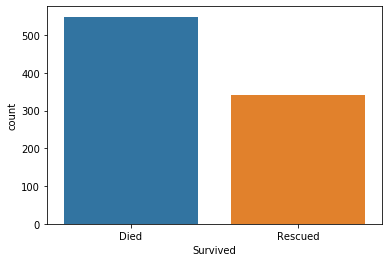

In [27]:
sns.countplot(x="Survived",data=newtitanic.replace({"Survived":{0:"Died",1:"Rescued"}}))

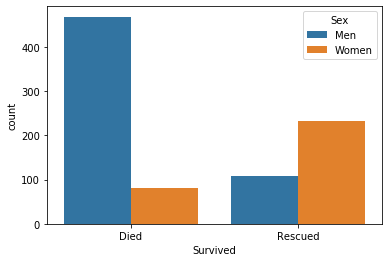

In [28]:
sns.countplot(x="Survived",data=newtitanic.replace({"Survived":{0:"Died",1:"Rescued"}}).replace({"Sex":{1:"Men",2:"Women"}}), hue="Sex")

In [29]:
data=newtitanic[["PassengerId","Survived"]].groupby("Survived").count().reset_index().replace({"Survived":{0:"Died",1:"Rescued"}}).set_index("Survived")
data.columns=['Nb. Passengers']
data

,Nb. Passengers
Survived,
Died,549
Rescued,342


### Pclass distribution
- most of the passengers are 3rd Class
- most of the dead are 3rd Class pasengers 

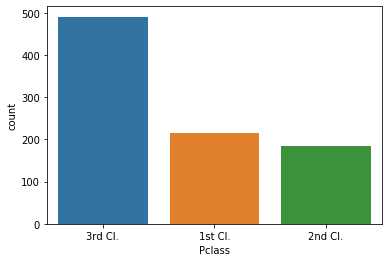

In [30]:
data=newtitanic.replace({"Pclass":{1:"1st Cl.",2:"2nd Cl.",3:"3rd Cl."}})

sns.countplot(x="Pclass",data=data)

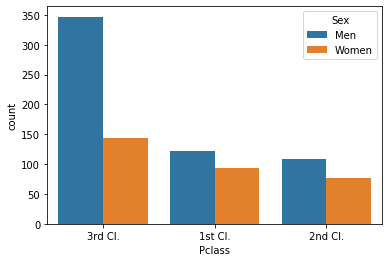

In [31]:
sns.countplot(x="Pclass",data=data.replace({"Sex":{1:"Men",2:"Women"}}), hue="Sex")

In [32]:
data=newtitanic[["PassengerId","Pclass"]].groupby("Pclass").count().reset_index().replace({"Pclass":{1:"1st Cl.",2:"2nd Cl.",3:"3rd Cl."}}).set_index("Pclass")
data.columns=['Nb. Passengers']
data

,Nb. Passengers
Pclass,
1st Cl.,216
2nd Cl.,184
3rd Cl.,491


In [33]:
newtitanic[["Survived","Pclass"]].groupby("Pclass").sum().reset_index().replace({"Pclass":{1:"1st Cl.",2:"2nd Cl.",3:"3rd Cl."}}).set_index("Pclass")

,Survived
Pclass,
1st Cl.,136
2nd Cl.,87
3rd Cl.,119


In [34]:
pclass_dict={"Pclass":{1:"1st Cl.",2:"2nd Cl.",3:"3rd Cl."}}
dead=newtitanic[["Survived","Pclass"]].replace({"Survived":{1:'y',0:'n'}}).replace({"Survived":{'y':0,'n':1}}).groupby("Pclass").sum().reset_index().replace(pclass_dict).set_index("Pclass")
dead.columns=["Died"]
dead

,Died
Pclass,
1st Cl.,80
2nd Cl.,97
3rd Cl.,372


### Sex Distribution
- there are more men than women on the titanic
- there are more dead men than dead women (may be there are many gentelmens)


In [35]:
data=newtitanic[["PassengerId","Sex"]].groupby("Sex").count().reset_index().replace({"Sex":{1:"Men",2:"Women"}}).set_index("Sex")
data.columns=['Nb. Passengers']
data

,Nb. Passengers
Sex,
Men,577
Women,314


In [36]:
dead=newtitanic[["Survived","Sex"]].replace({"Survived":{1:'y',0:'n'}}).replace({"Survived":{'y':0,'n':1}}).groupby("Sex").sum().reset_index().replace({"Sex":{1:"Men",2:"Women"}}).set_index("Sex")
dead.columns=["Died"]
dead

,Died
Sex,
Men,468
Women,81


### Embarked distribution
- most the passengers are from Southampton
- Southampton has the most proportion of deads

In [37]:
embarked_dict={"Embarked":{0:"Unknown",1:'Cherbourg',2:"Queenstown",3:"Southampton"}}
sex_dict={"Sex":{1:"Men",2:"Women"}}
survived_dict={"Survived":{1:'survived',0:'dead'}}

In [38]:
data=newtitanic[["PassengerId","Embarked"]].groupby(["Embarked"]).count().reset_index().replace(embarked_dict).set_index("Embarked")
data.columns=['Nb. Passengers']
data

,Nb. Passengers
Embarked,
Unknown,2
Cherbourg,168
Queenstown,77
Southampton,644


In [39]:
deadembarked=newtitanic[["PassengerId","Embarked","Survived"]].groupby(["Embarked","Survived"]).count().reset_index().replace(embarked_dict).replace(survived_dict).set_index("Embarked")
deadembarked=deadembarked.reset_index()
deadembarked=deadembarked.set_index(["Embarked","Survived"])
deadembarked.unstack()

PassengerId         
Survived           dead survived
Embarked                        
Cherbourg          75.0     93.0
Queenstown         47.0     30.0
Southampton       427.0    217.0
Unknown             NaN      2.0

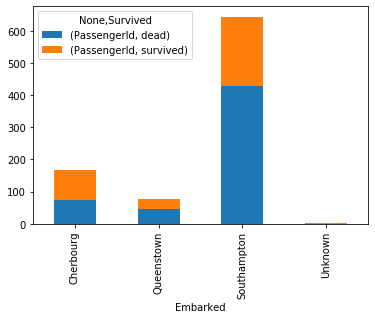

In [40]:
deadembarked.unstack().plot(kind='bar',stacked=True)

In [41]:
ports=['Cherbourg',"Queenstown","Southampton"]
deadembarked["Percentage"]=100

for emb in ports:
    s=deadembarked.loc[(emb,"survived"),"PassengerId"]
    d=deadembarked.loc[(emb,"dead"),"PassengerId"]
    
    deadembarked.loc[(emb,"survived"),"Percentage"]=(s/(s+d))*100
    deadembarked.loc[(emb,"dead"),"Percentage"]=(d/(s+d))*100
   
deadembarked

PassengerId  Percentage
Embarked    Survived                         
Unknown     survived            2  100.000000
Cherbourg   dead               75   44.642857
            survived           93   55.357143
Queenstown  dead               47   61.038961
            survived           30   38.961039
Southampton dead              427   66.304348
            survived          217   33.695652

### miscellaneous
- most deads from all regions are mens
- most the deads are from 3rd class and are specially from Southampton

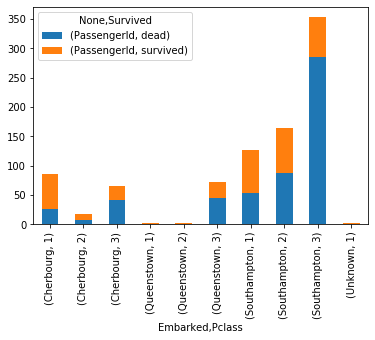

In [42]:
dead=newtitanic[["PassengerId","Embarked","Pclass","Survived"]].groupby(["Embarked","Pclass","Survived"]).count().reset_index().replace(embarked_dict).replace(survived_dict).replace(sex_dict).set_index("Embarked")
dead=dead.reset_index()
dead=dead.set_index(["Embarked","Pclass","Survived"])
dead.unstack()
dead.unstack().plot(kind='bar',stacked=True)

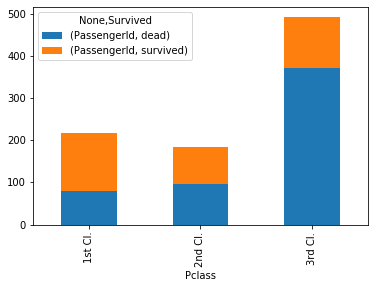

In [43]:
dead=newtitanic[["PassengerId","Pclass","Survived"]].groupby(["Pclass","Survived"]).count().reset_index().replace(embarked_dict).replace(survived_dict).replace(pclass_dict).set_index("Pclass")
dead=dead.reset_index()
dead=dead.set_index(["Pclass","Survived"])
dead.unstack()
dead.unstack().plot(kind='bar',stacked=True)

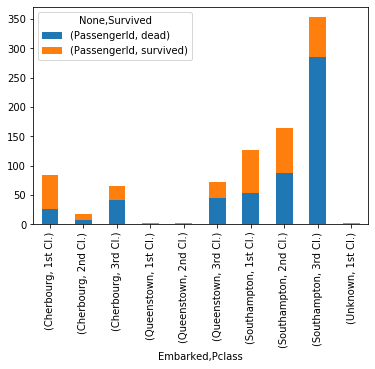

In [44]:
dead=newtitanic[["PassengerId","Embarked","Pclass","Survived"]].groupby(["Embarked","Pclass","Survived"]).count().reset_index().replace(embarked_dict).replace(survived_dict).replace(pclass_dict).set_index("Embarked")
dead=dead.reset_index()
dead=dead.set_index(["Embarked","Pclass","Survived"])
dead.unstack()
dead.unstack().plot(kind='bar',stacked=True)

# Correlation
**Visualise the corrolation between Sex and Age in a plot of your choosing, the visualised plot should give us obvious deductions concerning the importance of age and Sex in the survival of the individuals.**
## Sex vs Age
- There is an apparent positif correlation between Sex and Survived (0.543351) => Sex is a determining factor in the survival of passengers on the Titanic
- There is a negatif correlation between Age and Survived (-0.097701) => Old passengers are more exposed to death

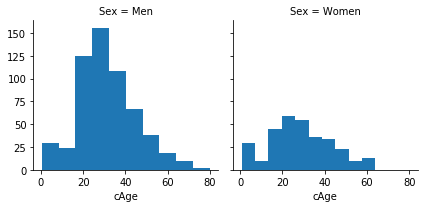

In [45]:
data=newtitanic.replace(sex_dict)
g=sns.FacetGrid(data,col="Sex")
g.map(plt.hist,"cAge")

In [46]:
data=newtitanic[["cAge","Sex","Survived"]]
data.corr()

,cAge,Sex,Survived
cAge,1.000000,-0.087900,-0.097701
Sex,-0.087900,1.000000,0.543351
Survived,-0.097701,0.543351,1.000000


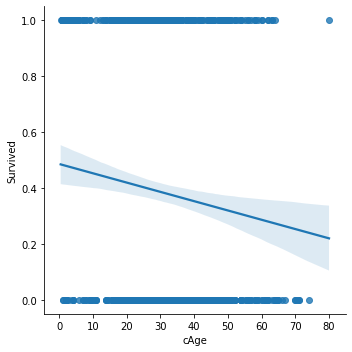

In [47]:
sns.lmplot(x="cAge",y="Survived",data=data)

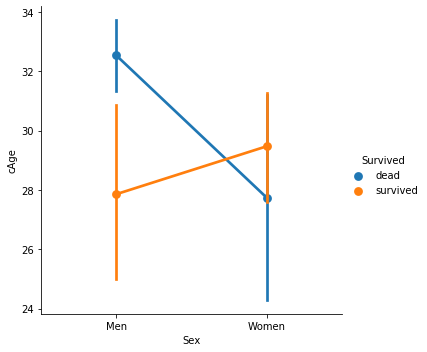

In [48]:
sns.catplot(x="Sex", y="cAge",hue="Survived" ,kind="point", data=newtitanic.replace(sex_dict).replace(survived_dict));

**Pick two other features and study their impact on the survival of the individuals : Pclass and Embarked**
- Passengers from 3rd Class are more exposed to death especially mens

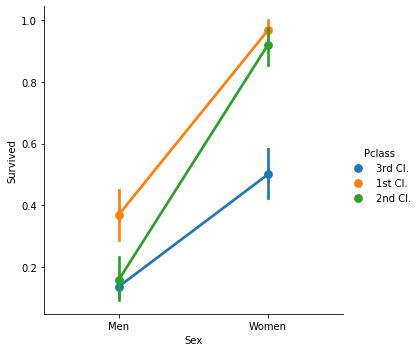

In [49]:
sns.catplot(x="Sex", y="Survived",hue="Pclass" ,kind="point", data=newtitanic.replace(pclass_dict).replace(sex_dict));

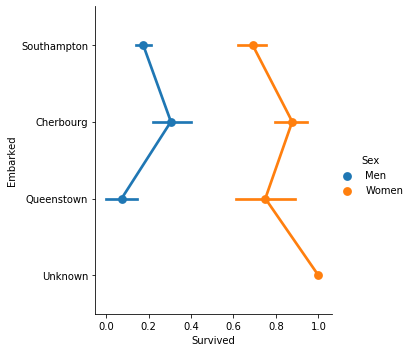

In [50]:
sns.catplot(x="Survived", y="Embarked",hue="Sex" ,kind="point", data=newtitanic.replace(pclass_dict).replace(embarked_dict).replace(sex_dict));

Have a look at this function plot_correlation_map( df ):

In [51]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

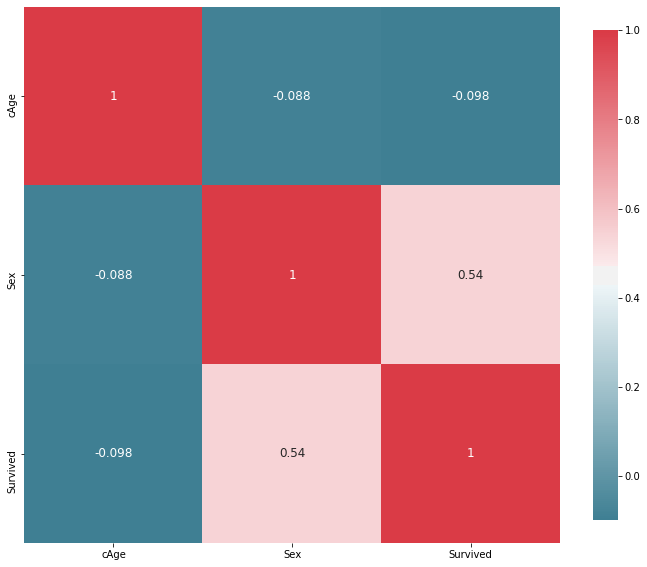

In [52]:
plot_correlation_map(data[["cAge","Sex","Survived"]])


The function **plot_correlation_map()** plots the heatmap of a dataset. It start by calculating the coorelation matrix of the dataset using **corr()** function. Then it init a plot using figure of size width=12, height=10 in inches and a colormap (cmap) using color palette (s is the drawn figure and ax are the axes of the plot). The function **sns.heatmap** draws the heatmap with graphic option cmap,square,cbar_kws and annotation activated and set to fontsize 12

   **Use the groupby function combined with the mean() to view the relation between pclass and survived**

In [53]:
newtitanic[["Survived","Pclass"]].replace(pclass_dict).groupby(["Pclass"]).mean().sort_values(by="Survived")

,Survived
Pclass,
3rd Cl.,0.242363
2nd Cl.,0.472826
1st Cl.,0.629630


The dead passengers are mostly from the 3rd Class then 2nd Class  

**As a final step try to drop the useless columns such as Names**

In [54]:
newtitanic.drop(["Ticket","Cabin"],axis=1,inplace=True)

In [55]:
newtitanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,cAge
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,-0.502445,3,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,0.786845,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",2,0,0,-0.488854,3,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,0.420730,3,35.0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,-0.486337,3,35.0


**create a new column called Title which contain the appropriate Title for each individual**

In [56]:
#!conda install -c anaconda nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

def extract_title(row):
    
    name=row["Name"]
    sex=row["Sex"]
    try:
        words=[word for word in name.split(",")[1].split() if word not in stopwords]
        return words[0]
    except:
        if sew==1:
            return 'Mr'
        else:
            return 'Mme'
    

[nltk_data] Downloading package stopwords to /home/hichem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
newtitanic["Title"]=newtitanic.apply(extract_title, axis=1)

**Visualise the correlation between Title and other features(e.g Sex, Fare, Age...)**

In [58]:
titles=list(newtitanic["Title"].unique())
titles

['Mr.',
 'Mrs.',
 'Miss.',
 'Master.',
 'Don.',
 'Rev.',
 'Dr.',
 'Mme.',
 'Ms.',
 'Major.',
 'Lady.',
 'Sir.',
 'Mlle.',
 'Col.',
 'Capt.',
 'Countess.',
 'Jonkheer.']

In [59]:
dict_c_titles=dict(zip(titles,range(len(titles))))
dict_i_titles={v:k for k,v in dict_c_titles.items()}

In [60]:
title_dict={"Title":dict_c_titles}
print(title_dict)

{'Title': {'Mr.': 0, 'Mrs.': 1, 'Miss.': 2, 'Master.': 3, 'Don.': 4, 'Rev.': 5, 'Dr.': 6, 'Mme.': 7, 'Ms.': 8, 'Major.': 9, 'Lady.': 10, 'Sir.': 11, 'Mlle.': 12, 'Col.': 13, 'Capt.': 14, 'Countess.': 15, 'Jonkheer.': 16}}


In [61]:
data=newtitanic.replace(title_dict,inplace=False)

In [62]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,cAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,-0.502445,3,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,0.786845,1,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",2,0,0,-0.488854,3,26.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,0.420730,3,35.0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,-0.486337,3,35.0,0


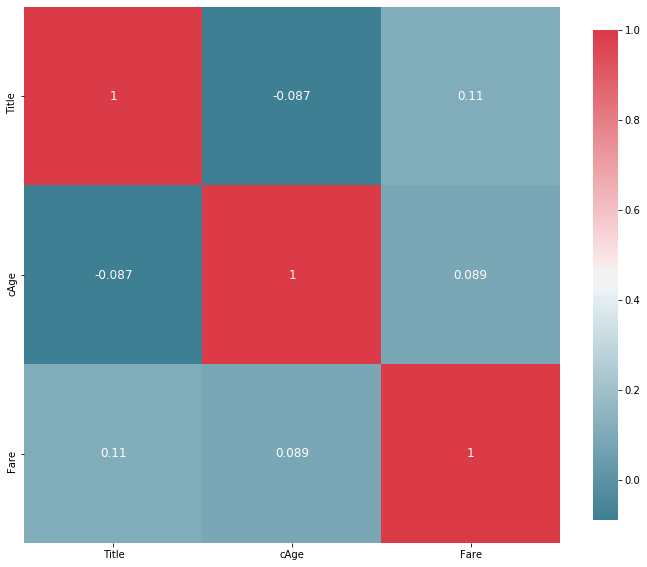

In [63]:
plot_correlation_map(data[["Title","cAge","Fare"]])

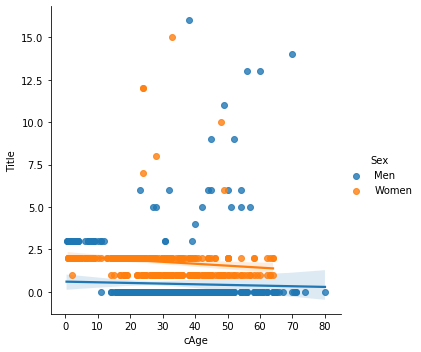

In [64]:
sns.lmplot(x="cAge",y="Title",hue="Sex",data=data.replace(sex_dict))

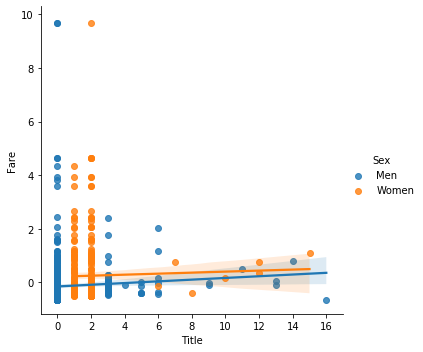

In [65]:
sns.lmplot(x="Title",y="Fare",hue="Sex",data=data.replace(sex_dict))


**try to group these titles into more useful ones**

In [66]:
Title_Dictionary = {'Capt.': 'Officer',
 'Col.': 'Officer',
 'Major.': 'Officer',
 'Dr.': 'Officer',
 'Rev.': 'Officer',
 'Jonkheer.': 'Royalty',
 'Don.': 'Royalty',
 'Sir.': 'Royalty',
 'Lady.': 'Royalty',
 'Countess.': 'Royalty',
 'Dona.': 'Royalty',
 'Mme.': 'Miss',
 'Mlle.': 'Miss',
 'Miss.': 'Miss',
 'Ms.': 'Mrs',
 'Mr.': 'Mrs',
 'Mrs.': 'Mrs',
 'Master.': 'Master'}
data=newtitanic.replace({"Title":Title_Dictionary})
data["Title"].unique()

array(['Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

**let's visualise the same correlations using these new titles now.**

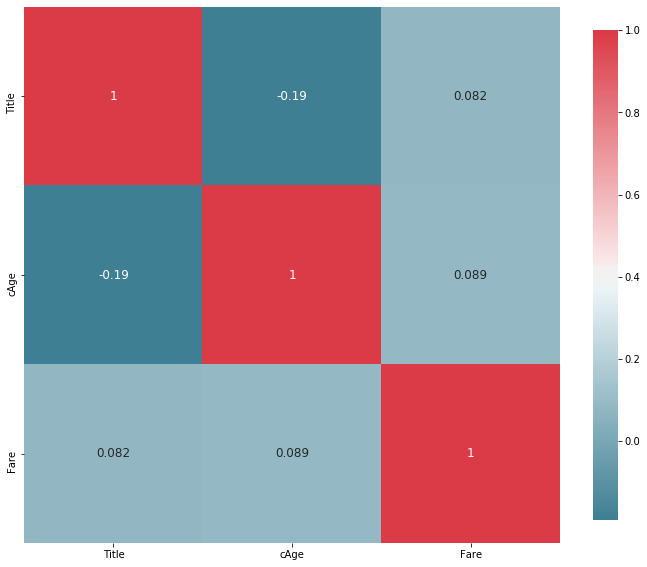

In [67]:
title_dict2={"Title":{'Mrs':0, 'Miss':1, 'Master':2, 'Royalty':3, 'Officer':4}}
data.replace(title_dict2,inplace=True)
plot_correlation_map(data[["Title","cAge","Fare"]])

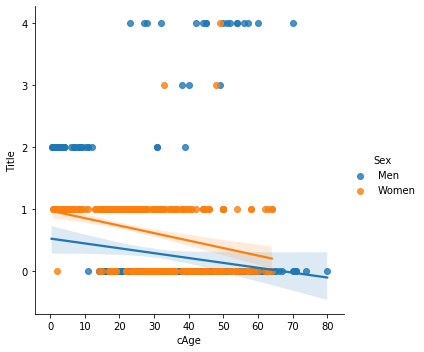

In [68]:
sns.lmplot(x="cAge",y="Title",hue="Sex",data=data.replace(sex_dict))

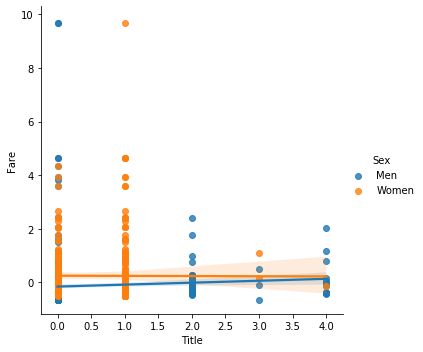

In [69]:
sns.lmplot(x="Title",y="Fare",hue="Sex",data=data.replace(sex_dict))

**use the Parch and the SibSp columns to create a more useful feature**

In [70]:
def family_size(row):
    sibsp=row["SibSp"]
    parch=row["Parch"]
    return sibsp+parch
data["FamilySize"]=data.apply(family_size , axis=1)

In [71]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,cAge,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,-0.502445,3,22.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,0.786845,1,38.0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",2,0,0,-0.488854,3,26.0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,0.420730,3,35.0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,-0.486337,3,35.0,0,0


**conclude if this feature is useful or not**
FamilySize is useful because it give information on mortality by gender. Infact women in big family tend to have more mortality than those in small family and it's inversed for mens (mens in big family tend to survive more than mens in small familly)

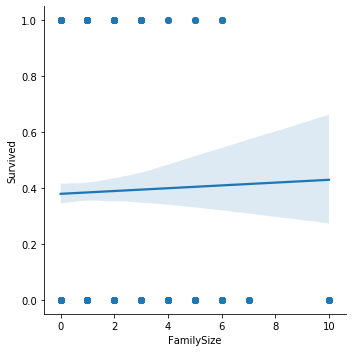

In [72]:
sns.lmplot(x="FamilySize",y="Survived",data=data.replace(sex_dict))

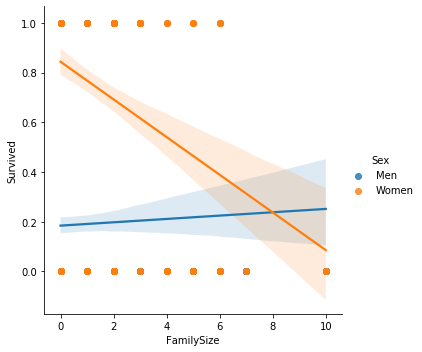

In [73]:
sns.lmplot(x="FamilySize",y="Survived",hue="Sex",data=data.replace(sex_dict))